<a href="https://colab.research.google.com/github/piumalnipun9/Assignment-1-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Assignment_1_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [45]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/emma.jpg"

# Read as grayscale
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Couldn't read the image. Check 'img_path' or upload an image.")

# Segment 1
lut = np.zeros(256, dtype=np.uint8)
lut[0:51] = np.arange(0, 51)

# Segment 2
x = np.arange(51, 150)
y = 100 + 1.55 * (x - 50)
lut[51:150] = np.clip(np.rint(y), 0, 255)

# Segment 3
lut[150:256] = np.arange(150, 256)

out = cv.LUT(img, lut)

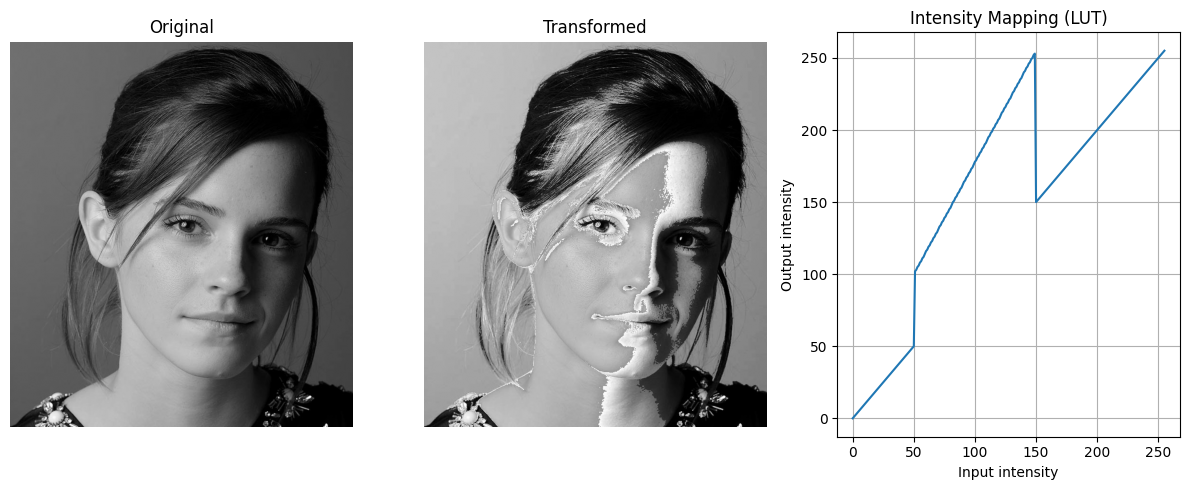

Saved: transformed.png


In [46]:
# @title Plot
#plot images

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.title("Transformed")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(np.arange(256), lut)
plt.title("Intensity Mapping (LUT)")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save result
cv.imwrite("transformed.png", out)
print("Saved:", "transformed.png")

# Question 2

In [57]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/brain_proton_density_slice.png"   # <- change to your file
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "Set a valid image path"

# 2) Two cut points (mid-tones ≈ gray matter, highs ≈ white matter)
# thresholds
gray_band_start   = 140   # start of gray-matter band
white_matter_start = 180  # start of white/bright band

# --- White matter: keep x>=white_matter_start, zero below ---
wm = np.zeros(256, dtype=np.uint8)
wm[white_matter_start:] = np.arange(white_matter_start, 256, dtype=np.uint8)

# --- Gray matter: keep gray_band_start <= x <= white_matter_start, zero outside ---
gm = np.zeros(256, dtype=np.uint8)
gm[gray_band_start:white_matter_start+1] = np.arange(gray_band_start, white_matter_start+1, dtype=np.uint8)

# Apply
wm_img = cv.LUT(img, wm)
gm_img = cv.LUT(img, gm)


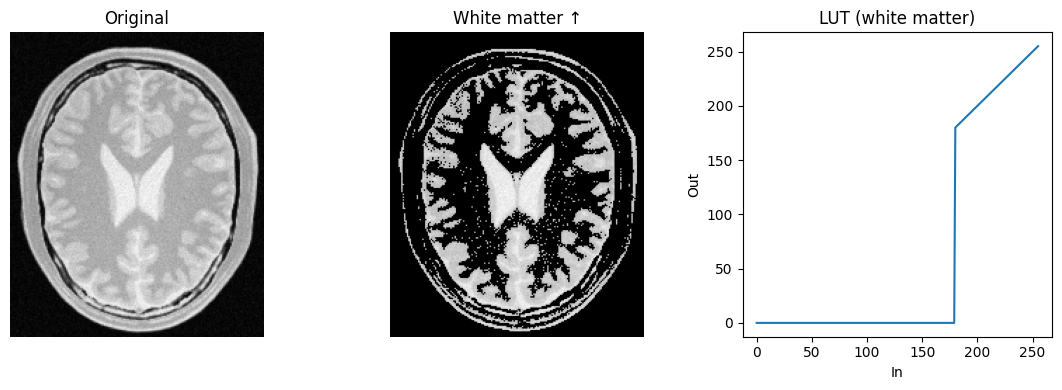

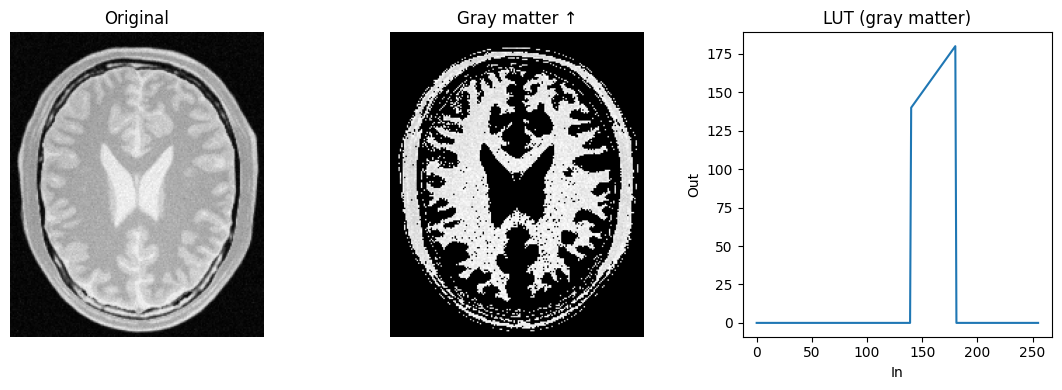

In [58]:
# @title Plot
plt.figure(figsize=(11,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');    plt.title("Original");            plt.axis('off')
plt.subplot(1,3,2); plt.imshow(wm_img, cmap='gray'); plt.title("White matter ↑");      plt.axis('off')
plt.subplot(1,3,3); plt.plot(x, wm);                 plt.title("LUT (white matter)");  plt.xlabel("In"); plt.ylabel("Out"); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');    plt.title("Original");           plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gm_img, cmap='gray'); plt.title("Gray matter ↑");      plt.axis('off')
plt.subplot(1,3,3); plt.plot(x, gm);                 plt.title("LUT (gray matter)");  plt.xlabel("In"); plt.ylabel("Out"); plt.tight_layout(); plt.show()


# Question 3

In [59]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/highlights_and_shadows.jpg"
img = cv.imread(img_path)

assert img is not None, "Provide a valid image."
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# --- Gamma on L channel (Lab) ---
gamma_value = 0.78   # <1 brightens, >1 darkens; state this value in your report
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

L_f = L.astype(np.float32) / 255.0
L_corr = np.clip((L_f ** gamma_value) * 255.0, 0, 255).astype(np.uint8)

lab_corr = cv.merge([L_corr, a, b])
rgb_corr = cv.cvtColor(lab_corr, cv.COLOR_LAB2RGB)

Gamma used: 0.78


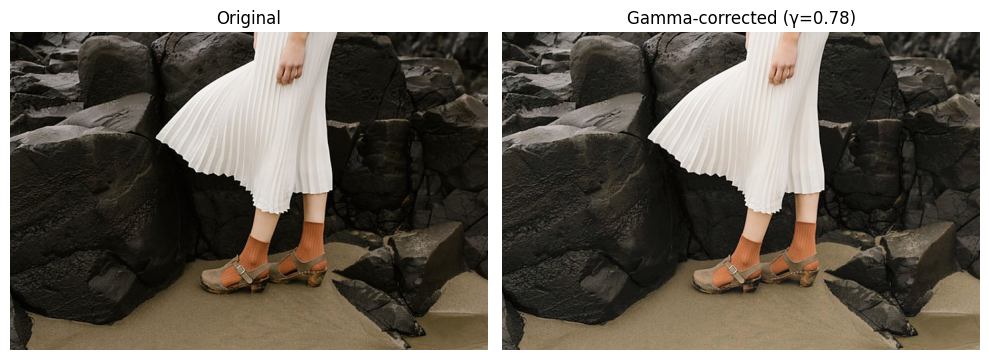

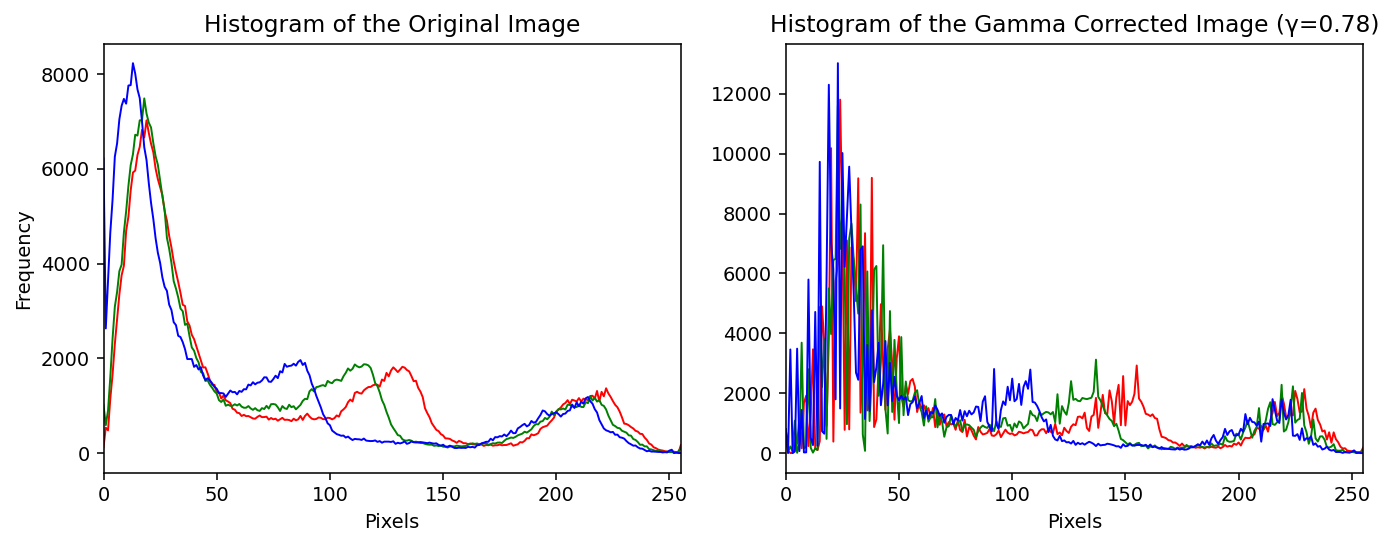

In [60]:
# @title Plot
print("Gamma used:", gamma_value)

# Show images
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(rgb);       plt.title("Original");   plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rgb_corr);  plt.title(f"Gamma-corrected (γ={gamma_value})"); plt.axis('off')
plt.tight_layout(); plt.show()

# Histograms of L (original vs corrected), side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140)
# Left: original
for c, col in enumerate(('r','g','b')):
    h, _ = np.histogram(rgb[..., c].ravel(), bins=256, range=(0,256))
    axs[0].plot(x, h, color=col, linewidth=1)
axs[0].set_title("Histogram of the Original Image")
axs[0].set_xlabel("Pixels"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255)

# Right: gamma-corrected
for c, col in enumerate(('r','g','b')):
    h, _ = np.histogram(rgb_corr[..., c].ravel(), bins=256, range=(0,256))
    axs[1].plot(x, h, color=col, linewidth=1)
axs[1].set_title(f"Histogram of the Gamma Corrected Image (γ={gamma_value})")
axs[1].set_xlabel("Pixels"); axs[1].set_xlim(0,255)

plt.tight_layout(); plt.show()

# Question 4

In [51]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/spider.png"   # <- change to your file
bgr = cv.imread(img_path); assert bgr is not None

# 2) Split into HSV planes
hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

# 3) Vibrance transform on the Saturation plane
a = 0.55
sigma = 70.0  # given
x = np.arange(256, dtype=np.float32)
T = np.minimum(x + a*128.0*np.exp(-((x-128.0)**2)/(2.0*sigma**2)), 255.0).astype(np.uint8)

S_enh = cv.LUT(S, T)

# 4) Recombine and convert for display
hsv_enh = cv.merge([H, S_enh, V])
rgb      = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb_enh  = cv.cvtColor(hsv_enh, cv.COLOR_HSV2RGB)

Used a = 0.55, sigma = 70.0


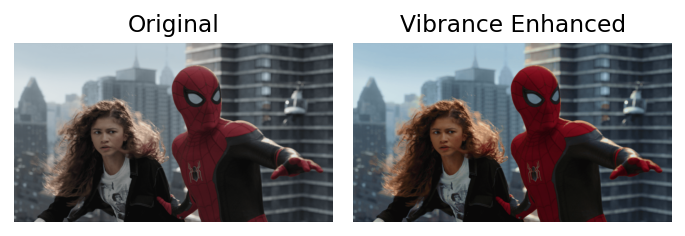

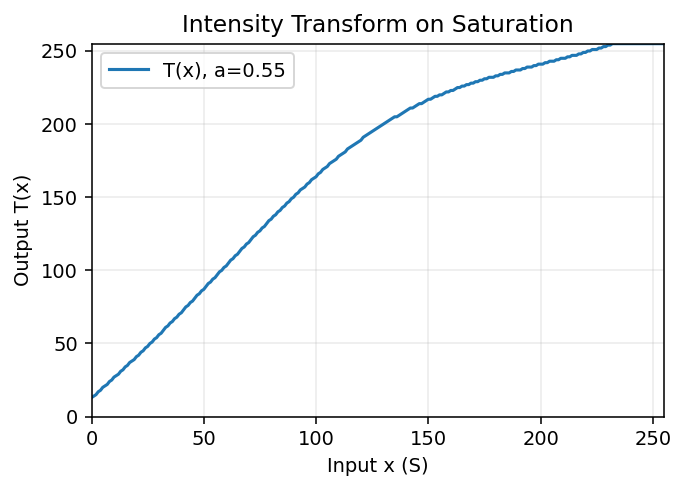

In [52]:
# @title Plot
print(f"Used a = {a}, sigma = {sigma}")

# 5) Show images
plt.figure(figsize=(5,2), dpi=140)
plt.subplot(1,2,1); plt.imshow(rgb);     plt.title("Original");           plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rgb_enh); plt.title("Vibrance Enhanced");  plt.axis('off')
plt.tight_layout(); plt.show()

# 6) Show the intensity transformation curve
plt.figure(figsize=(5,3.6), dpi=140)
plt.plot(x, T, linewidth=1.6, label=f'T(x), a={a}')
plt.xlim(0,255); plt.ylim(0,255)
plt.xlabel("Input x (S)"); plt.ylabel("Output T(x)")
plt.title("Intensity Transform on Saturation")
plt.grid(alpha=0.25); plt.legend(); plt.tight_layout(); plt.show()

# Question 5

In [67]:
# @title Main {"display-mode":"code"}
img_path = "/content/drive/MyDrive/A1- Images/shells.tif"
gray = cv.imread(img_path, cv.IMREAD_UNCHANGED)
assert gray is not None, "Check img_path"

# Ensure single-channel grayscale
if gray.ndim == 3:
    gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)

# Ensure 8-bit input for our LUT method
if gray.dtype != np.uint8:
    gray = cv.normalize(gray, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# Custom histogram equalization
def hist_equalize_gray(img8):
    hist = np.bincount(img8.ravel(), minlength=256)
    cdf  = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    lut = np.round((cdf_m - cdf_m.min()) * 255 / (img8.size - cdf_m.min())).astype(np.uint8)
    lut = np.ma.filled(lut, 0)
    eq  = lut[img8]
    hist_eq = np.bincount(eq.ravel(), minlength=256)
    return eq, hist, hist_eq, lut

eq, hist_before, hist_after, lut = hist_equalize_gray(gray)

# Plot histograms
x = np.arange(256)
cdf_o = hist_before.cumsum()
cdf_e = hist_after.cumsum()

cdf_o_norm = (cdf_o / cdf_o[-1]) * hist_before.max()
cdf_e_norm = (cdf_e / cdf_e[-1]) * hist_after.max()

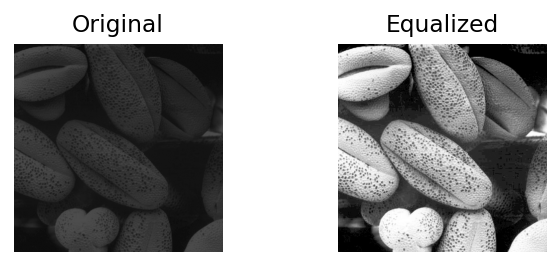

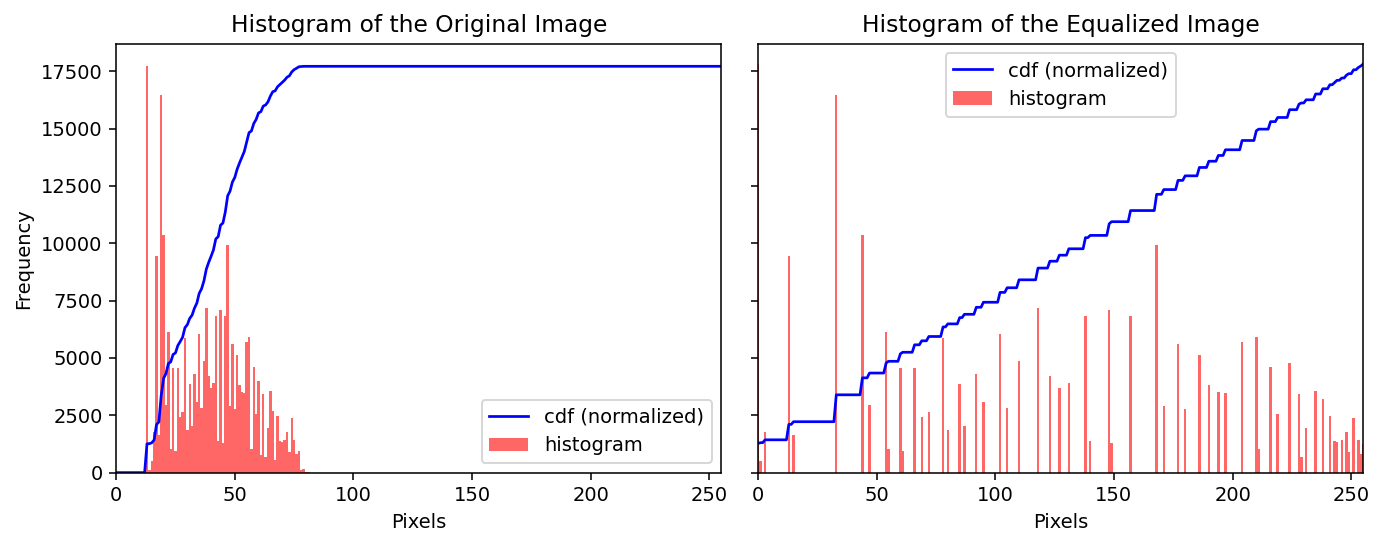

In [68]:
# @title Plot  {"form-width":"1px","display-mode":"code"}
# Show images
plt.figure(figsize=(5,2), dpi=140)
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray', vmin=0, vmax=255); plt.title("Original");  plt.axis('off')
plt.subplot(1,2,2); plt.imshow(eq,   cmap='gray', vmin=0, vmax=255); plt.title("Equalized"); plt.axis('off')
plt.tight_layout(); plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=140, sharey=True)

axs[0].bar(x, hist_before, color='red', width=1, alpha=0.6, label='histogram')
axs[0].plot(x, cdf_o_norm, color='blue', linewidth=1.4, label='cdf (normalized)')
axs[0].set_title("Histogram of the Original Image")
axs[0].set_xlabel("Pixels"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255)
axs[0].legend()

axs[1].bar(x, hist_after, color='red', width=1, alpha=0.6, label='histogram')
axs[1].plot(x, cdf_e_norm, color='blue', linewidth=1.4, label='cdf (normalized)')
axs[1].set_title("Histogram of the Equalized Image")
axs[1].set_xlabel("Pixels"); axs[1].set_xlim(0,255)
axs[1].legend()

plt.tight_layout(); plt.show()

# Question 6

In [72]:
# @title Main
img_path = "/content/drive/MyDrive/A1- Images/jeniffer.jpg"
bgr = cv.imread(img_path); assert bgr is not None
hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

# (b) Make a foreground mask (Otsu on Saturation; swap to V if better)
thresh_val, _ = cv.threshold(S, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask_fg = (S > thresh_val).astype(np.uint8) * 255

# (c) Keep only foreground on V (for histogram)
V_fg = cv.bitwise_and(V, V, mask=mask_fg)
vals_before = V[mask_fg>0]

# (d) Cumulative sum (CDF) of the foreground histogram
hist_before = np.bincount(vals_before, minlength=256)
cdf_before  = hist_before.cumsum()

# (e) Histogram-equalize FOREGROUND ONLY (custom LUT)
N = vals_before.size
cdf_m = np.ma.masked_equal(cdf_before, 0)
lut_fg = np.round((cdf_m - cdf_m.min()) * 255 / (N - cdf_m.min())).astype(np.uint8)
lut_fg = np.ma.filled(lut_fg, 0)

V_eq = V.copy()
V_eq[mask_fg>0] = lut_fg[V[mask_fg>0]]

# (f) Recombine background + equalized foreground
hsv_eq = cv.merge([H, S, V_eq])
bgr_eq = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)
rgb     = cv.cvtColor(bgr,    cv.COLOR_BGR2RGB)
rgb_eq  = cv.cvtColor(bgr_eq, cv.COLOR_BGR2RGB)

vals_after  = V_eq[mask_fg>0]
hist_after  = np.bincount(vals_after, minlength=256)
cdf_after   = hist_after.cumsum()

x = np.arange(256)
cdf_before_norm = (cdf_before / cdf_before[-1]) * hist_before.max()
cdf_after_norm  = (cdf_after  / cdf_after[-1])  * hist_after.max()

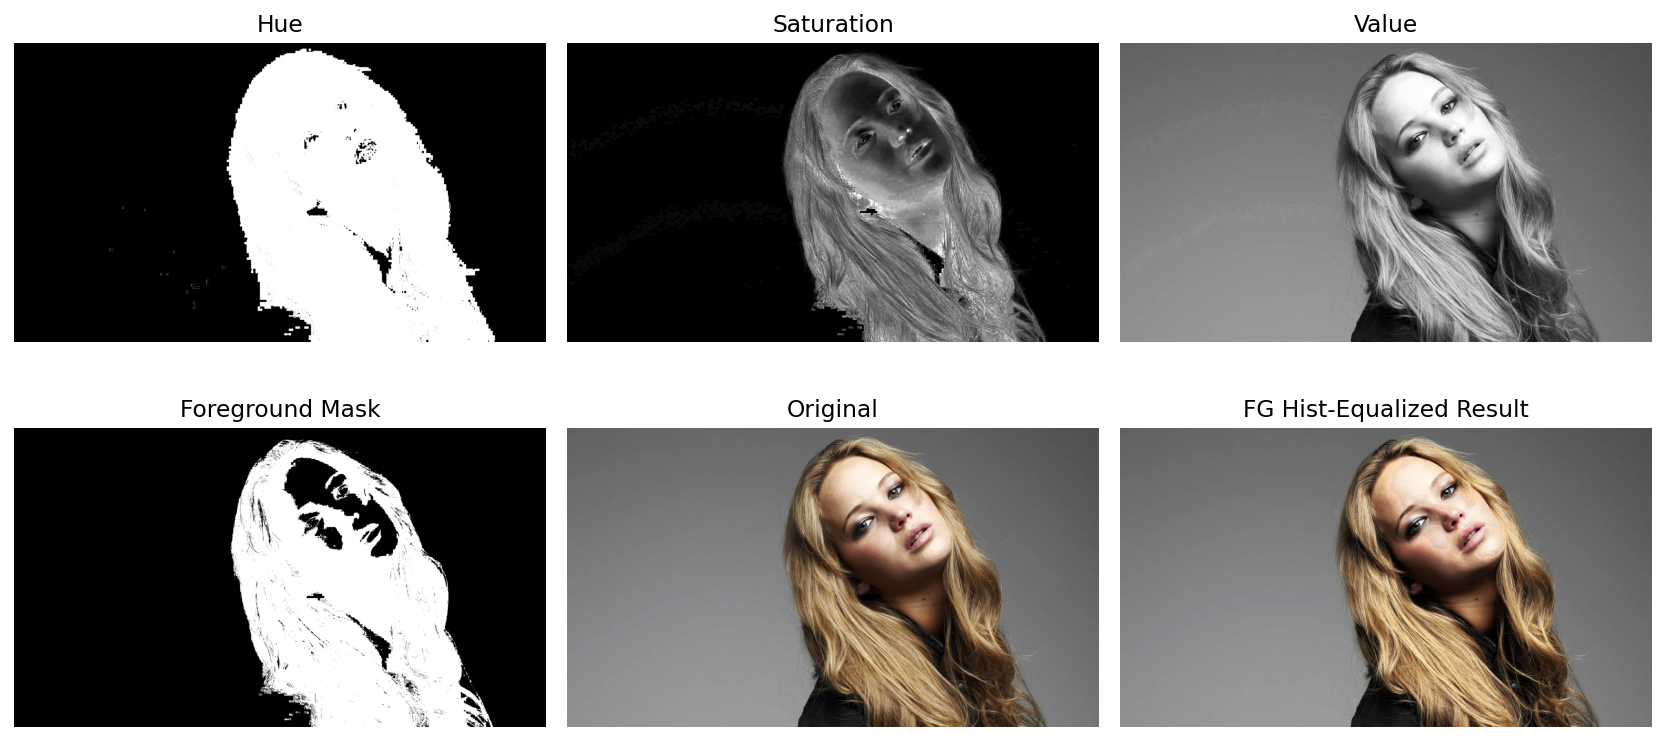

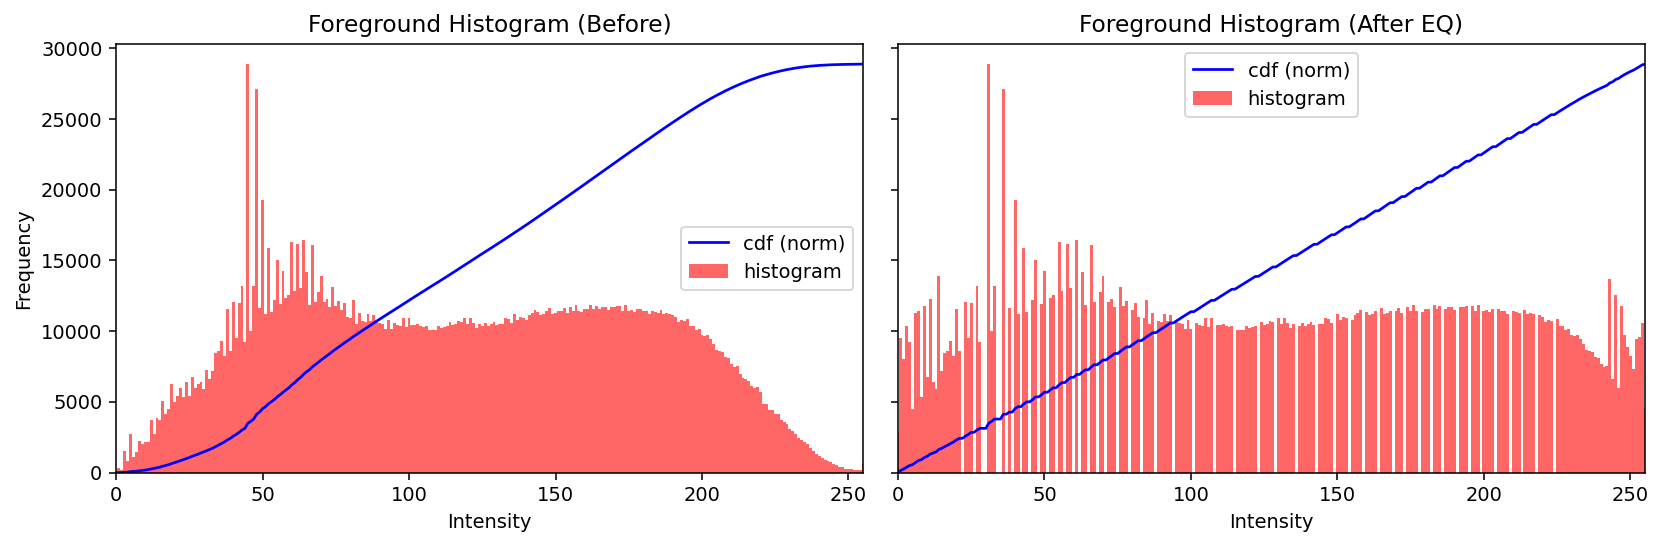

In [73]:
# @title Code

# Show H, S, V, mask, original, result

plt.figure(figsize=(12,6), dpi=140)
plt.subplot(2,3,1); plt.imshow((H*255/179).astype(np.uint8), cmap='gray'); plt.title("Hue"); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(S, cmap='gray'); plt.title("Saturation"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(V, cmap='gray'); plt.title("Value"); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(mask_fg, cmap='gray'); plt.title("Foreground Mask"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(rgb);    plt.title("Original"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(rgb_eq); plt.title("FG Hist-Equalized Result"); plt.axis('off')
plt.tight_layout(); plt.show()

fig, axs = plt.subplots(1,2, figsize=(12,4), dpi=140, sharey=True)
axs[0].bar(x, hist_before, width=1, color='red', alpha=0.6, label='histogram')
axs[0].plot(x, cdf_before_norm, color='blue', lw=1.4, label='cdf (norm)')
axs[0].set_title("Foreground Histogram (Before)"); axs[0].set_xlabel("Intensity"); axs[0].set_ylabel("Frequency"); axs[0].set_xlim(0,255); axs[0].legend()

axs[1].bar(x, hist_after, width=1, color='red', alpha=0.6, label='histogram')
axs[1].plot(x, cdf_after_norm,  color='blue', lw=1.4, label='cdf (norm)')
axs[1].set_title("Foreground Histogram (After EQ)"); axs[1].set_xlabel("Intensity"); axs[1].set_xlim(0,255); axs[1].legend()

plt.tight_layout(); plt.show()


# Question 7

# Question 8

# Question 9